In [19]:
import warnings
warnings.filterwarnings('ignore')
import requests
from bs4 import BeautifulSoup
import numpy as np
import re
import pandas as pd 
import csv
from typing import List
from inspect import k
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns


import ssl
ssl._create_default_https_context = ssl._create_unverified_context
#verify= False

In [2]:
def cas_morts():

    url = "https://www.worldometers.info/coronavirus/countries-where-coronavirus-has-spread/"# specify the url
    
    page = requests.get(url, verify= False)# Nous faisons la connexion à la page web 
    # nous pouvons analyser le html avec BeautifulSoup
    soup = BeautifulSoup(page.text, 'lxml') # stockant l’objet dans la variable « Soup »

    data = [['Pays', 'Nombres de cas', 'Nombre de décés', 'Région'], ] # écrire les en-têtes de la  liste data
    # Mettre en place des boucles à travers l’objet soup pour trouver des éléments
    parent_table = soup.find('table', class_=re.compile("table"), id='table3')# find results within table
    for item in parent_table.find("tbody").find_all("tr"):# loop over results, find all columns per result
        _data = item.find_all("td") #chercher tous les balises td donc le contenu des colonnes
        # nettoyage de données
        if _data[0].string == "Japan (+Diamond Princess)": ## extract description from the name of the country :on remplace  "Japan (+Diamond Princess)" par "Japon"
            _data[0].string = "Japan" 
            # write each result to rows
        data.append([
            _data[0].string, #1er élément de la liste d'indice 0 qui est le pays 
            str(_data[1].string).replace(",", ""), ## on supprime les caractères indésirables : on remplace la virgule par le vide dans le nombre de cas  
            str(_data[2].string).replace(",", ""), #  on remplace la virgule par le vide dans le nombre de décès 
            _data[3].string,
        ])

    # affichage par ordre décroissant des nombre de cas confirmés
    data.sort(key=lambda row: row[1], reverse=True)

    #on crée un tableau numpy 2D
    numpyArray_1 = np.array(data)
    df1 = pd.DataFrame(numpyArray_1, columns= numpyArray_1[0])
    df1 = df1.drop([0])
    return numpyArray_1

cas_morts()

array([['Pays', 'Nombres de cas', 'Nombre de décés', 'Région'],
       ['Rwanda', '99765', '1332', 'Africa'],
       ['Gambia', '9973', '341', 'Africa'],
       ['Yemen', '9806', '1894', 'Asia'],
       ['Isle of Man', '9796', '57', 'Europe'],
       ['China', '97314', '4636', 'Asia'],
       ['Cuba', '953183', '8246', 'North America'],
       ['Morocco', '946543', '14683', 'Africa'],
       ['Anguilla', '944', '1', 'North America'],
       ['Kazakhstan', '941793', '12133', 'Asia'],
       ['Vietnam', '932357', '22205', 'Asia'],
       ['United Kingdom', '9130857', '140964', 'Europe'],
       ['MS Zaandam', '9', '2', None],
       ['Jamaica', '89170', '2246', 'North America'],
       ['Maldives', '88058', '243', 'Asia'],
       ['Switzerland', '879049', '11275', 'Europe'],
       ['Hungary', '876497', '30920', 'Europe'],
       ['Jordan', '866451', '11062', 'Asia'],
       ['Russia', '8593200', '240871', 'Europe'],
       ['Austria', '840902', '11380', 'Europe'],
       ['Greenland', '

In [3]:
def population():

    url = "https://www.worldometers.info/world-population/population-by-country/"
    """
    meme logique que cas_morts()
    """

    page = requests.get(url, verify= False)
    soup = BeautifulSoup(page.text, 'lxml')

    data = [['Nom du pays', 'Population']]

    for item in soup.select('table tbody tr'):
        _data = item.find_all("td")
        data.append(
            [
                _data[1].string, #champ1 nom du pays
                _data[2].string, #champ 2 Population
            ]
        )

    numpyArray_2 = np.array(data)

    df2 = pd.DataFrame(numpyArray_2, columns= numpyArray_2[0])
    df2 = df2.drop([0])
    return  numpyArray_2 #renvoie tableau numpy 2D

population()

array([['Nom du pays', 'Population'],
       ['China', '1,439,323,776'],
       ['India', '1,380,004,385'],
       ['United States', '331,002,651'],
       ['Indonesia', '273,523,615'],
       ['Pakistan', '220,892,340'],
       ['Brazil', '212,559,417'],
       ['Nigeria', '206,139,589'],
       ['Bangladesh', '164,689,383'],
       ['Russia', '145,934,462'],
       ['Mexico', '128,932,753'],
       ['Japan', '126,476,461'],
       ['Ethiopia', '114,963,588'],
       ['Philippines', '109,581,078'],
       ['Egypt', '102,334,404'],
       ['Vietnam', '97,338,579'],
       ['DR Congo', '89,561,403'],
       ['Turkey', '84,339,067'],
       ['Iran', '83,992,949'],
       ['Germany', '83,783,942'],
       ['Thailand', '69,799,978'],
       ['United Kingdom', '67,886,011'],
       ['France', '65,273,511'],
       ['Italy', '60,461,826'],
       ['Tanzania', '59,734,218'],
       ['South Africa', '59,308,690'],
       ['Myanmar', '54,409,800'],
       ['Kenya', '53,771,296'],
       ['South

In [4]:
def capitales_coordonnees():
    """
    cette fonction recupere les les pays et leurs cordonnées.
    On prend seulment les cas ou la capital est primaire.
    """
    capitales_coordonnees = [] 
    input_file = open("worldcities.csv", encoding="utf8")
    lines = input_file.readlines()  # Each line corresponds to a capital coordonnee
    input_file.close()

    data = {} #on crée un dictinnaire vide

    for ligne in lines[1:]: # on saute l'en-tete
        ligne = ligne.split(",")
        if ligne[8] == "primary":  #si la ville est la capitale principale on garde ces coordonnes 
            pays, latitude, longitude = ligne[4], ligne[2], ligne[3] 
            if  data.get(pays,None) is None:
                data[pays] =  [pays, latitude, longitude]
    data = [['nom du pays', 'latitude', 'longitude'], ] + list(data.values())
    numpyArray_3 = np.array(data)  #renvoie les valeurs du dict comme un numpy arrays 2D
    df3 = pd.DataFrame(numpyArray_3, columns= numpyArray_3[0])
    df3 = df3.drop([0])
    return numpyArray_3

capitales_coordonnees()

array([['nom du pays', 'latitude', 'longitude'],
       ['Japan', '35.6897', '139.6922'],
       ['Indonesia', '-6.2146', '106.8451'],
       ['Philippines', '14.5958', '120.9772'],
       ['South Korea', '37.5833', '127.0000'],
       ['Mexico', '19.4333', '-99.1333'],
       ['China', '39.9050', '116.3914'],
       ['Egypt', '30.0561', '31.2394'],
       ['Russia', '55.7558', '37.6178'],
       ['Thailand', '13.7500', '100.5167'],
       ['Argentina', '-34.5997', '-58.3819'],
       ['Bangladesh', '23.7161', '90.3961'],
       ['Iran', '35.7000', '51.4167'],
       ['Congo (Kinshasa)', '-4.3317', '15.3139'],
       ['France', '48.8566', '2.3522'],
       ['United Kingdom', '51.5072', '-0.1275'],
       ['Peru', '-12.0500', '-77.0333'],
       ['Colombia', '4.6126', '-74.0705'],
       ['Angola', '-8.8383', '13.2344'],
       ['Malaysia', '3.1478', '101.6953'],
       ['Vietnam', '21.0245', '105.8412'],
       ['Sudan', '15.6031', '32.5265'],
       ['Chile', '-33.4500', '-70.6667'],


In [5]:
def donnees_completes():
    '''
    On va créer un fichier donnees_corona.csv à partir des trois tableaux numpy crés précidemment  : 
    '''
    tab_cas_mort = cas_morts()
    tab_population = population()
    tab_longitude = capitales_coordonnees()
    # on crée une liste data 
    data = [['pays', 'nombre de cas', 'nombre de décés', 'Region',"population","latitude","longitude"]]
    for item in tab_cas_mort:
        pays = item[0]
        if pays in tab_population[:, 0] and pays in tab_longitude[:, 0]:
            index_population = np.where(tab_population[:, 0] == pays)[0][0]
            index_geos = np.where(tab_longitude[:, 0] == pays)[0][0]
            _population = tab_population[index_population,1] 
            l = list(item)+ [_population.replace(",",""),] + list(tab_longitude[index_geos][1:]) # on fait une concaténation des caractéristiques 
            data.append(list(map(str,l)))
    
    numpyArray = np.array(data)
    pd.DataFrame(numpyArray).to_csv("donnees_corona.csv", index=False, header=False)# convertir le tableau numpy en fichier cvs en utilisant pandas

In [6]:
donnees_completes() 

In [7]:
def tableau_donnees(file_name: str = "donnees_corona.csv"):
    with open(file_name, 'r') as f:
        
        df = np.genfromtxt(
            f, 
            dtype=str,
            delimiter=',')
        data = pd.DataFrame(df, columns = df[0])
        data = data.drop([0])
        return df
df = tableau_donnees()

In [8]:
df

array([['pays', 'nombre de cas', 'nombre de décés', ..., 'population',
        'latitude', 'longitude'],
       ['Rwanda', '99765', '1332', ..., '12952218', '-1.9536', '30.0606'],
       ['Gambia', '9973', '341', ..., '2416668', '13.4531', '-16.5775'],
       ...,
       ['El Salvador', '113422', '3647', ..., '6486205', '13.6989',
        '-89.1914'],
       ['Portugal', '1091592', '18171', ..., '10196709', '38.7452',
        '-9.1604'],
       ['Cameroon', '102499', '1686', ..., '26545863', '3.8578',
        '11.5181']], dtype='<U24')

In [9]:
def corona_par_region():
    """
    on recupere data depuis le fichier en utilisant la fonction precedement codé 
    """
    data = tableau_donnees() #on utilise la fonction précedente pour avoir les data
    final_result = [['Region','Cases','Deaths','population']]
    data = data[1:, [1, 2, 3, 4]]
    result = pd.DataFrame(data,columns=['Cases','Deaths','Region','population'])
    result['Cases'] = result['Cases'].astype(int)  #on convertie en int
    result['Deaths'] = result['Deaths'].astype(int)
    result['population'] = result['population'].astype(int)
    result = result.groupby("Region").sum()
    _index = list(result.index.values)
    for item in zip(_index,result.to_numpy()):
        final_result.append(
            [
                item[0],
                *item[1]
            ]
        )
    data = pd.DataFrame(np.array(final_result), columns = ["Region","Case", "Deaths", "population"])
    cor_reg= data.drop([0])
    return cor_reg

cor_reg = corona_par_region()

In [10]:
cor_reg

,Region,Case,Deaths,population
1,Africa,8317108,215077,1215989517
2,Asia,78612210,1150617,4541149750
3,Australia/Oceania,261955,2829,41435313
4,Europe,62642629,1259038,731220601
5,North America,54440730,1117029,547866583
6,South America,38392812,1170565,430457604


In [11]:
def corona_par_pays(pays:List=None):
    data = tableau_donnees()[1:]
    result = [['Country',"Cases/M","Deaths/M","population","latitude", "longitude"]]
    result = []#on crée une liste vide que on va par la suite remplir
    if pays:
        _index = np.in1d(data[:,0],pays)
        data = data[_index]
    for item in data:
        result.append(
            [
                item[0],
                int(item[1])/int(item[4])*1000000, #on convertie en int pour avoir le nombre de cas par milliers d'habitants  et on divise le nombre de cas par le nombre de population et on multiplie par 1000000
                int(item[2])/int(item[4])*1000000, #on convertie en int pour avoir le nombre de décès par milliers d'habitants  et on divise le nombre de décès par le nombre de population et on multiplie par 1000000
                int(item[4]), #on convertie en int
                float(item[5]), #on convertie en float
                float(item[6]) #on convertie en float

            ]
        )
    array = np.array(result) #on transforme en tableau  numpy 2D
    data = pd.DataFrame(array, columns = array[0])
    data= data.drop([0])
    return array 


In [12]:
corona_par_pays()

array([['Rwanda', '7702.541757712848', '102.83952910613456', '12952218',
        '-1.9536', '30.0606'],
       ['Gambia', '4126.7563438585685', '141.10337042572667', '2416668',
        '13.4531', '-16.5775'],
       ['Yemen', '328.77395010602174', '63.501719508546316', '29825964',
        '15.35', '44.2'],
       ...,
       ['El Salvador', '17486.65051443795', '562.2702335186755',
        '6486205', '13.6989', '-89.1914'],
       ['Portugal', '107053.36398243786', '1782.0455599939157',
        '10196709', '38.7452', '-9.1604'],
       ['Cameroon', '3861.2042863326765', '63.51272136076345',
        '26545863', '3.8578', '11.5181']], dtype='<U32')

In [13]:
def donnees_pire_pays(k:int,n:int=0):
    """
    fonction qui prend comme input le nbr des pays(k) et le nbr d'habitants (n)
    donne en output les données selon nbr de déces par habitants (ordre decroissant)
    """
    data = corona_par_pays()
    result = data[:,3].astype(int)>n #index
    data = data[result]
    data = data[data[:,2].astype(float).argsort()][::-1]#on convertie le nombre de décès en float et on organise les pays selon le nombre de décès par millier d'habitants 
    if k==0:
        return data 
    return data[:k]

In [14]:
donnees_pire_pays(k=2)

array([['Peru', '66789.96576898589', '6074.150395061193', '32971854',
        '-12.05', '-77.0333'],
       ['Bulgaria', '87573.40671186143', '3498.4805952986603', '6948445',
        '42.6975', '23.3241']], dtype='<U32')

In [15]:
#pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org cartopy

In [16]:
#conda install -c condo-forge cartopy

In [20]:
#import cartopy.crs as ccrs
#from statistiques_corona import corona_par_region, donnees_pire_pays, tableau_donnees

#plt.figure(figsize=(20, 3))

filename='donnees_corona.csv'
def tableau_donnees():
  
    return  np.genfromtxt(filename, delimiter=',',names=True,dtype=None,encoding='utf8')


def camenbertdeaths_region():
    """
    afficher camebert des mort en utlisant l'output de la fonction corona_par_region
    """
    regions = cor_reg.iloc[1:,0]
    
    deaths = cor_reg.iloc[1:,2]
    fig1, ax1 = plt.subplots()
    ax1.pie(deaths,labels=regions, autopct='%1.1f%%')
    ax1.axis('equal')
    plt.savefig("deaths_by_region.png")

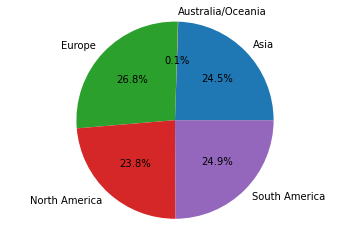

In [21]:
camenbertdeaths_region()

In [22]:
def camenbertcases_region():
    """
    afficher camebert des cas en utlisant l'output de la fonction corona_par_region
    meme logique que la fonction précedente. 
    """
    regions = cor_reg.iloc[1:,0]
    
    deaths = cor_reg.iloc[1:,2]
    fig1, ax1 = plt.subplots()
    ax1.pie(deaths,labels=regions, autopct='%1.1f%%')
    ax1.axis('equal')
    plt.pie(deaths, labels = regions)
    plt.savefig("cases_by_regions.png")

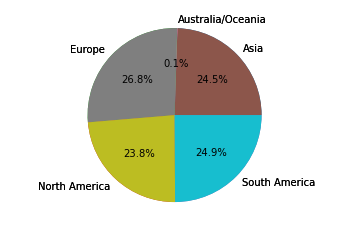

In [23]:
camenbertcases_region()

In [24]:
def baton_mort_pays(countries=[]):
    """
    afficher le nbr de morts des pays choisi en argument sous forme de formed de diagramme en baton
    """
    data = tableau_donnees()
    if countries:
        _index = np.in1d(data[:,0],countries)
        data = data[_index]
    labels = list(data[:,0])
    deaths = list(data[:,2].astype(int))
    width = 0.2       
    fig, ax = plt.subplots()

    ax.bar(labels, deaths, width, label='deaths')
    ax.set_ylabel('Deaths')
    ax.set_title(' Deaths by country')
    ax.legend()

    plt.savefig("death_by_country.png")

In [25]:
def baton_cas_pays(countries=[]):
    """
    afficher le nbr de cas des pays choisi en argument sous forme de formed de diagramme en baton
    """
    data = tableau_donnees()[1:]
    if countries:
        _index = np.in1d(data[:,0],countries)
        data = data[_index]
    labels = list(data[:,0])
    cases = list(data[:,1].astype(int))
    width = 0.9     
    fig, ax = plt.subplots()
    ax.bar(labels, cases, width, label='cases')
    ax.set_ylabel('Cases')
    ax.set_title('Cases by country')
    ax.legend()
    plt.savefig("cases_by_country.png")

In [26]:
def pire_baton_mort(k,n=0):
    """
    afficher les nombre de cas des K pays les plus touché par la pandémie. k et n étant des parametres.
    """
    morts=donnees_pire_pays(k,n)  #on utilise la fonction précedement codé
    pays = morts[:,0]
    mort = morts[:,2].astype(float) # on convertie en float 
    sns.barplot(pays,mort)   #nous traçons le graph
    plt.xlabel("pays")
    plt.ylabel("morts en million")
    plt.savefig("baton_pire_pays.png")

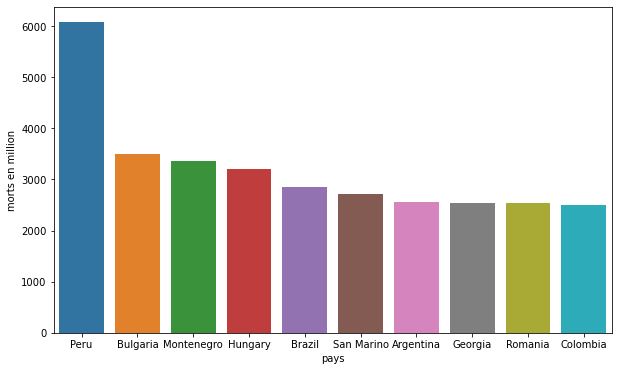

In [27]:
plt.figure(figsize = (10, 6))
pire_baton_mort(10)

In [28]:
def carte(k=0):
    """
    dessine une carte du monde,sur laquelle on  met k cercles avec le centre dans les capitales des
    k pays ayant le plus de morts par millions d’habitants.
    """ 

    morts=donnees_pire_pays(k,0)
    lon = morts[:,5].astype(float)
    lat = morts[:,4].astype(float)
    death = morts[:,2].astype(float)
    plt.figure(figsize=(20,10))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.stock_img()
    ax.coastlines()
    
    plt.scatter(x=lon, y=lat,
        color="orangered",
        s=death,
        alpha=0.8,
        transform=ccrs.PlateCarree()) ## Important
    plt.savefig("carte.png")

# carte()

Est ce que vous voulez voir des informations sur le coronavirus
 oui


a- le nombre de cas par région,
b-les pays ayant le plus grand nombre de mort ou de cas par millions d’habitants, 
c- connaître le nombre de morts et/ou de cas dans les pays de votre choix 


 a


we called <function camenbertcases_region at 0x7ff705d30f70>


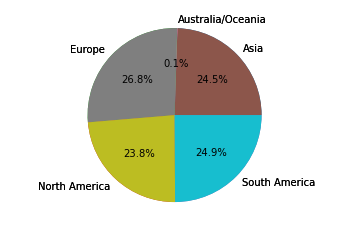

In [30]:

# on va créer une interface utilisateur 

user_inp = {
    "a":{
        "message":"a- le nombre de cas par région,",
        "fn":camenbertcases_region,
    },
    "b":{
        "fn":{
            "a":{
                "message":"a- le nombre de cas par région,",
                "fn":baton_cas_pays,
            },
            "b":{
                "message":"b- le nombre de mort par région,",
                "fn":baton_mort_pays,
            },
        },
        "message":"b-les pays ayant le plus grand nombre de mort ou de cas par millions d’habitants, "
    },
    "c":{
        "fn":{
            "a":{
                "message":"a- le nombre de cas par région,",
                "fn":baton_cas_pays,
                "need_inp":"please provide your countries as list sepeerated by ,\n"
            },
            "b":{
                "message":"b- le nombre de mort par région,",
                "fn":baton_mort_pays,
                "need_inp":"please provide your countries as list sepeerated by ,\n"
            },
        },
        "message":"c- connaître le nombre de morts et/ou de cas dans les pays de votre choix "
    },
    
}

def get_user_inp(value,_user_inp):
    inp = _user_inp.get(value,None)
    if not inp:
        print(f"not a valid choice {inp}")
        return
    else:
        _user_inp = inp['fn']
        if callable(_user_inp):

            message = inp.get('need_inp','')
            if message:
                res = input(message).split(",")
                _user_inp(res)
                print(f"we called {_user_inp} with args:{res}")

            else:
                _user_inp()
                print(f"we called {_user_inp}")
            return
        else:
            for item in _user_inp.values():
                print(item['message'])
            res = input()
            return get_user_inp(res,_user_inp)


# on commence par demander à l’utilisateur s’il veut avoir des informations sur le coronavirus
res = input("Est ce que vous voulez voir des informations sur le coronavirus\n")
#Si l’utilisateur répond oui, on lui propose différentes options puis affiche le graphe correspondant
if res == "oui":
    for item in user_inp.values():
        print(item['message'])
    value = input("")
    get_user_inp(value,user_inp)
else:
    print("prenez soin de vous à la prochaine")
